In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Joint Probability and Find the Gap
Suppose the goal is to take a series of images of galaxies which necessitates very long exposures in a narrow field-of-view (FOV). The expected (mean) number of galaxies in this FOV is $19.3$.

## Part (a)
How many exposures in separate FOVs are needed so that the probability of seeing at least 100 galaxies is greater than 50%? (Think simple!)

![](Q1a.png)

## Part (b)
Your proposal review insists that you need at least 100 galaxies and requires a 99% chance that you will succeed. How many exposures do you need now?

![](Q1b.png)

## Part (c)
There is a problem, however. A "contaminating" star is one that is bright enough to saturate the image to the point that one cannot determine the properties of galaxies. The expected (mean) number of "contaminating" stars one FOV is $5.1$. Your assignment is to find enough FOVs in the sky without contaminating stars to get the needed long-term exposures. Your advisor (who did not take statistics) comes up with a simple plan. Divide the sky in sectors, each with an area of the FOV with no overlap and take a short images; a contaminating star will emerge quickly. How many sectors do you expect to examine to find enough uncontaminated FOVs?

![](Q1c.png)

## Part (d)
What an effort! But another problem comes up. Due to the long exposure time and scheduling limitations of the telescope, there is a limited region of the sky that can be used. It is $1000 \text{ as}$ by $1000 \text{ as}$ whereas your FOV is a $100 \text{ as}$ diameter circle. At best there are only a little over 100 such sectors. You now remember the "Find the Gap" lecture and you realize that there are many more possible exposures. You take a star map of the entire usable region. Demonstrate you can find enough open regions. Your choice as to how.

**Hint:** One way is to create a random star map using positions as $x= \text{uniform random}$ between $0$ and $1000 \text{ as}$ and $y= \text{uniform random}$ between $0$ and $1000 \text{ as}$. Find values on a $1000 \times 1000$ grid $[x,y]$ in which no stars are within $50 \text{ as}$.

Text(0, 0.5, 'y')

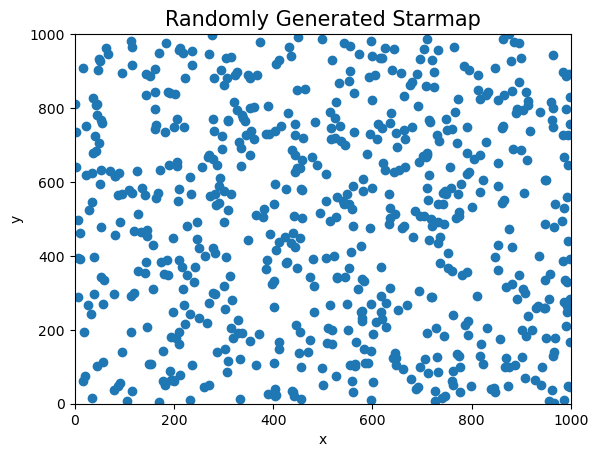

In [2]:
random.seed(100)
# generate random star map
N = 650         # number of stars to generate in map
x_FOV = 1000
y_FOV = 1000
x_array=[]
y_array=[]
for _ in range(N+1):
    xi = random.uniform(0,x_FOV)
    yi = random.uniform(0,y_FOV)
    x_array.append(xi)
    y_array.append(yi)

x_array = np.array(x_array)
y_array = np.array(y_array)

# random star map
plt.plot(x_array,y_array,'o')
plt.title("Randomly Generated Starmap",fontsize=15)
plt.xlim(0,x_FOV)
plt.xlabel("x")
plt.ylim(0,y_FOV)
plt.ylabel("y")

### Jasmine's Note to Self
(Admittedly found after a quick google search)

To determine if a point $(x_i,y_i)$ lies outside a circle with center coordinate $(x_{circle},y_{circle})$ and radius, $R$, it must meet the following criteria:

$$(x_i - x_{circle})^2 + (y_i - y_{circle})^2 > R^2$$

In [3]:
# find gaps with circular fields of view
circ_centers = []
R = 50                          # radius of FOV
for cx in range(R,x_FOV-R+1):
    for cy in range(R,y_FOV-R+1):
        criteria = (x_array-cx)**2 + (y_array - cy)**2
        if all(criteria > R**2):
            circ_centers.append((cx,cy))

print("Found {} gaps with no stars in circular FOVs with Radius {} as".format(len(circ_centers),R))

Found 6055 gaps with no stars in circular FOVs with Radius 50 as


Text(0, 0.5, 'y')

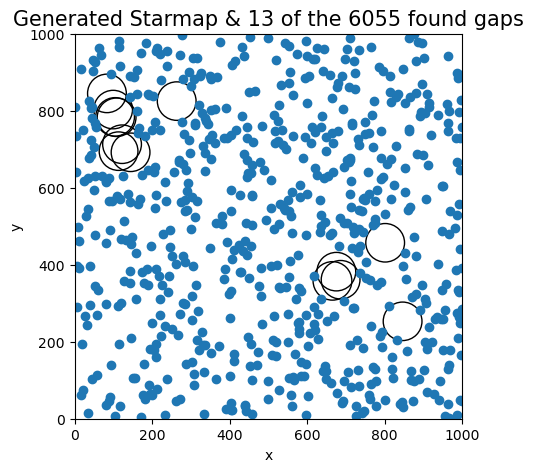

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x_array,y_array,'o')
cnt = 0
for i in range(0,len(circ_centers),500):
    ax.add_patch(plt.Circle(circ_centers[i],radius = R,fill=False))
    cnt += 1
plt.title("Generated Starmap & {} of the {} found gaps".format(cnt,len(circ_centers)),fontsize=15)
plt.xlim(0,x_FOV)
plt.xlabel("x")
plt.ylim(0,y_FOV)
plt.ylabel("y")

# 2. Multi-variant Uncertainties
Stellar parallax measurements are made by measuring the relative motion of a nearby star ($S_A$) with respect that of a distant object ($S_B$) due to Earth's orbit about the Sun. All images, however, have finite resolution; even though a star should make a single point on an image the star's intensity has a finite width, often referred to a point-spread function. The probability that a photon is recorded at position $x$ is: 

\begin{equation}
P(x) = \frac{1}{\Delta x \sqrt{2 \pi}} e^{-\frac{(x-x_0)^2}{2\Delta x^2}}
\end{equation}

## Part (a)
In the above equation, $\Delta x$ is a property of, for example, the telescope diameter and the CCD resolution. Suppose $\Delta x = 20 \text{ pixels}$. Star $S_A$ records $10^3$ photons and $S_B$ yields $10^4$ photons. What is the $1-\sigma$ variance in the position of each of the stars (in *pixels*)?

![](Q2a.png)

## Part (b)
Given the above, what is the uncertainty in the distance between the stars?

![](Q2b.png)

## Part (c)
The calibration relating *pixels* to *mas* is $c=10 \text{ mas/pixel} \pm 0.2 \%$. Suppose $S_A$ and $S_B$ are separated by $250$ pixels. What is $d$ and the uncertainty in $d$ in *mas*? Which uncertainty ($a$, $b$, or $c$) makes the largest contribution to the uncertainty in $d$?

<center>
<img src="stellar.PNG" width="300"/>
</center>

In [5]:
delta_x = 250
c = 10

d = delta_x*c
print("d = {}".format(d), "mas")

d = 2500 mas


Uncertainty in $d$:
![](Q2c.png)

# 3. Gamma Ray Bursts
Gamma Ray Bursts (GRBs) were first detected in the 1960s by defense satellites that were designed to verify the nuclear test ban treaty. These detectors had little ability to determine the source direction, but enough to determine that GRBs were not from Earth.

To investigate GRBs, the next satellite-borne detectors had all-sky coverage combined with separate detectors with fields-of-view of roughly $0.04 \text{ sr}$ ($0.3 \%$ of the sky; gamma rays are difficult to focus). The GRB energy is so high that it was at thought by  many (at the time) that GRBs must be of galactic origin. GRBs are detected at a rate of about one per day.

## Part (a)
Start by dividing the sky into two equal parts; one part contains the galactic plane and the other part is the rest of the sky (which has two sub-parts, but not a concern here). Most models predicted that a majority (at least $60 \%$) of GRBs should be detected in a $2\pi \text{ sr}$ region containing the galactic plane. To test this hypothesis, assume that $60$ of GRBs are coming from the galactic plane. Estimate (no computer) how long was it expected to take the observations to show that the fraction of events in the galactic plane is $2\sigma$ higher than $50\%$, proving a galactic origin model.

In [6]:
# will come back to this later

## Part (b)
After roughly one year, say that 166 GRBs are detected in the galactic plane out of 320 events. Let's examine the expected value of $r_{GP}$, the ratio of the number of events from galactic plane to the number of total events. By computer, compute and plot the Gaussian probability distribution as a function of $r_{GP}$ using the mean and $\sigma$ from the above statistics. Why Gaussian? The number of events may be a bit too high to compute Poisson statistics directly. Mark the $\pm 2\sigma$ area. Compute the CDF. What is the probability that $r_{GP}$ is $60\%$ or higher?

In [7]:
# will come back to this later

## Part (c)
The idea that GRBs are extra-galactic was difficult to accept. However, after 9 years 2512 GRBs were detected of which close to $50\%$ came from the galactic plane, which ruled out all but the most die-hard galactic-origin theories. The next test was to determine if there was any bias in GRB direction. The sky was parsed into 300 equally-sized sectors. Suppose the histogram is: $$H = [0,1,2,8,9,25,37,37,40,36,41,23,23,8,3,3,2,1,1]$$
Does the GRB histogram match a Poisson distribution?

**Hint:** Cut and paste $H$ into your code and plot. Overplot the expected distribution of the 300 sectors. What is the most likely number of GRBs per sector ($\mu'$)? What is $\chi_\nu^2$? How does $\chi_\nu^2$ compare with the expected distribution? What do you conclude?

In [8]:
import os,sys
parent_dir = os.path.abspath("..")  # string path to parent directory of file
os.chdir(parent_dir)                # changes cwd to specified directory path


from hw_helper_func import poisson  
# I'm importing code I made separately in a different python script file
# feel free to ask me for it if needed!
# But it's actually the same code that I've written out in HW1 & HW2

In [9]:
H = [0,1,2,8,9,25,37,37,40,36,41,23,23,8,3,3,2,1,1]

# getting the mean value based on the values of "H"
ind = []
for i in range(len(H)):
    ind.append(i*H[i])

s = sum(ind)
mean = s/(sum(H))

print("mean (based on histogram results):",mean)

mean (based on histogram results): 8.373333333333333


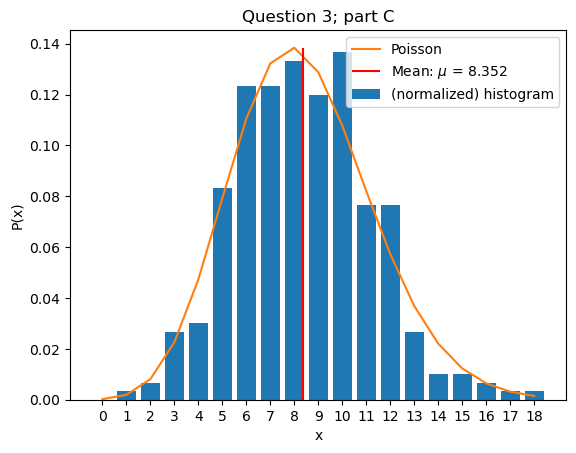

In [10]:
q3c = poisson(x_min=0,x_max=len(H)-1,mu=mean)
# print("x:",q3c.x)

plt.bar(q3c.x,np.array(H)/sum(H), label='(normalized) histogram')
q3c.plot_poisson(title="Question 3; part C",label='Poisson')
plt.xticks(q3c.x)

q3c.calculate_mean_mode_sigma(x=q3c.x,Px=q3c.Px)
q3c.plot_mark_mean(Px=q3c.Px,colors='red',linestyles='solid')

plt.legend()
plt.show()

### Jasmine's note to self

\begin{align*}
\chi_N^2 &= \displaystyle \sum_{i=1}^N \frac{(x_i - \mu')^2}{\sigma^2} \\
&\approx \frac{\text{expected variance}}{\text{actual variance}} = \frac{\sigma'^2}{\sigma^2}
\end{align*}

In [11]:
P_Hx = np.array(H)/sum(H)  # "probabilities" based on histograms
sigma2_prime = q3c.Expectation(fx=(q3c.x-mean)**2,Px=P_Hx)   # sigma^2 from histogram results

chi2 = sigma2_prime/(q3c.sigma**2)
print("chi-squared:",chi2)

chi-squared: 0.9604764044774297


## Part (d)
To perform another $\chi_\nu^2$ test, all of the 300 sectors are expected to have, within error, the same number of GRBs. That is, $f(x)=\mu'$, which is now well determined. We also know $\sigma ^2 = \mu'$ well. What is $\chi_\nu^2$? What do you conclude?

**Hint:** Explode $H$ into a 300-point array ($X$): $X = [0,1,2,3,3,3,3,3,3,3,3,(9 \text{   } 4 \text{s}),(25 \text{   } 5 \text{s}), \text{etc.}]$

### Jasmine's note to self

\begin{align*}
\chi_N^2 &= \displaystyle \sum_{i=1}^N \frac{(x_i - \mu')^2}{\sigma^2} \\
&\approx \displaystyle \sum_{i=1}^N \frac{(x_i - \mu')^2}{\mu'}
\end{align*}

In [12]:
X = []

for i,hi in enumerate(H):
    X += [i]*hi

print("Check that X is what I want it to be")
print("Preview of X (first 10 elements):",X[:10])
print("Number of elements in X (should be 300):",len(X))

Check that X is what I want it to be
Preview of X (first 10 elements): [1, 2, 2, 3, 3, 3, 3, 3, 3, 3]
Number of elements in X (should be 300): 300


In [13]:
chi_i = []

for i,xi in enumerate(X):
    numerator = (xi - mean)**2
    denominator = mean
    chi_i.append(numerator/denominator)

print("chi-squared:",sum(chi_i)/len(X))

chi-squared: 0.944341825902335
